In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15217445313049619204
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10735602893
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17301066273621253305
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


### Lecture des données d'apprentissage et de test

In [2]:
# Lecture des données d'apprentissage
N_classes = 10

# path="" # Si les données sont dans le répertoire courant sinon:
path=""
Dtrain=pd.read_csv(path+"mnist_train.zip",header=None)

X_train = Dtrain.values[:,:-1] # Reprend tout le tableau sauf la dernière colonne 
Y_train = Dtrain.values[:,-1] # Récupère la dernière colonne du tabelau qui correspond à ? 

Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
X_test = Dtest.values[:,:-1]
Y_test = Dtest.values[:,-1] # label

In [3]:
Y_train_cat = ku.to_categorical(Y_train, N_classes) # convert a class vector to binary class matrix
Y_test_cat = ku.to_categorical(Y_test, N_classes) # Nombre de colonne correspond au nombre de classe
# le nombre de lignes de la matrice correspond au nombre d'éléments du vecteur original. 
# Chaque ligne corespond à un élément du vecteur initial si cet élément appartient à la j-ème classe
# ie la j-ème colonne on met 1 le reste sera par des 0.

In [4]:
X_train_conv = X_train.reshape(60000, 28, 28, 1)
X_test_conv = X_test.reshape(10000, 28, 28, 1)

### Etude des sorties de chaque couche 

#### Modèle sans décomposition des couches 

In [5]:
# descrition du réseau
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))



# Résumé
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
# Apprentissage
model.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 1.1987 - acc: 0.8652 - val_loss: 0.0704 - val_acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1156 - acc: 0.9673 - val_loss: 0.0607 - val_acc: 0.9811
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0854 - acc: 0.9751 - val_loss: 0.0527 - val_acc: 0.9852
Epoch 4/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0636 - acc: 0.9807 - val_loss: 0.0387 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0541 - acc: 0.9842 - val_loss: 0.0437 - val_acc: 0.9872
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0479 - acc: 0.9862 - val_loss: 0.0439 - val_acc: 0.9867
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0439 - acc: 0.9865 - val_loss: 0.0346 - val_ac

In [7]:
model_imgs = model.predict(X_test_conv)


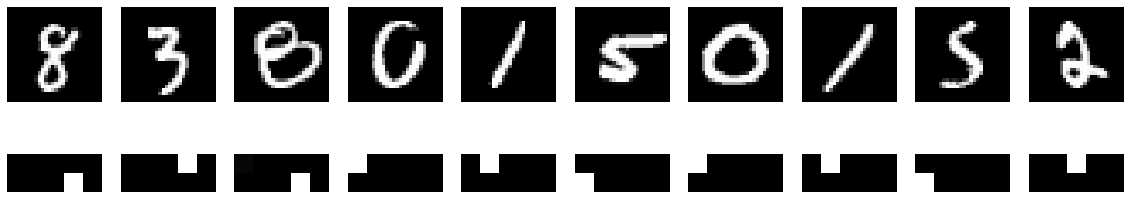

In [67]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i +1 )
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(model_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## II. Modèle avec décomposition des couches  

In [9]:
Conv2D_1 = km.Sequential(name="conv2D1")
Conv2D_1.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last",name = "conv2D1"))

Conv2D_2 = km.Sequential(name="conv2D2")
Conv2D_2.add(kl.Conv2D(64, (3, 3), activation='relu',name ="conv2D2"))

Maxpool = km.Sequential(name="Maxpool")
Maxpool.add(kl.MaxPooling2D(pool_size=(2, 2), name ="Maxpool"))
Maxpool.add(kl.Dropout(0.25))
Maxpool.add(kl.Flatten())

Dense1 = km.Sequential(name = "dense1")
Dense1.add(kl.Dense(128, activation='relu',name ="dense1"))
Dense1.add(kl.Dropout(0.5))


Dense2 = km.Sequential(name ="dense2")
Dense2.add(kl.Dense(N_classes, activation='softmax',name ="dense2"))


modeldecomp = km.Sequential(name="modèle décomposé")
modeldecomp.add(Conv2D_1)
modeldecomp.add(Conv2D_2)
modeldecomp.add(Maxpool)
modeldecomp.add(Dense1)
modeldecomp.add(Dense2)
modeldecomp.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2D1 (Sequential)         (None, 26, 26, 32)        320       
_________________________________________________________________
conv2D2 (Sequential)         (None, 24, 24, 64)        18496     
_________________________________________________________________
Maxpool (Sequential)         (None, 9216)              0         
_________________________________________________________________
dense1 (Sequential)          (None, 128)               1179776   
_________________________________________________________________
dense2 (Sequential)          (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [10]:
modeldecomp.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

modeldecomp.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/step - loss: 1.6929 - acc: 0.8389 - val_loss: 0.0661 - val_acc: 0.9792
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1110 - acc: 0.9677 - val_loss: 0.0438 - val_acc: 0.9857
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0826 - acc: 0.9761 - val_loss: 0.0445 - val_acc: 0.9854
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0643 - acc: 0.9806 - val_loss: 0.0334 - val_acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0556 - acc: 0.9840 - val_loss: 0.0355 - val_acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0468 - acc: 0.9860 - val_loss: 0.0367 - val_acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0452 - acc: 0.9866 - val_loss: 0.0343 - val_acc

In [11]:
modeldecomp_imgs = modeldecomp.predict(X_test_conv)
Conv2D_1_imgs =Conv2D_1.predict(X_test_conv)
Conv2D_2_imgs =Conv2D_2.predict(Conv2D_1_imgs)
Maxpool_imgs =Maxpool.predict(Conv2D_2_imgs)
Dense1_imgs =Dense1.predict(Maxpool_imgs)
Dense2_imgs =Dense2.predict(Dense1_imgs)


In [12]:
def selection_4(img) : # img correspond a l ensemble des sortie pour UNE SEULE image
    shape = np.shape(img)[2] 
    m = 0 
    for i in range(shape) :
        m = m + npl.norm(img[:,:,i])
    m = m / shape # cela correspond a la moyenne des normes de tous les neurones pour une image donnée 
                    # on considere cette moyenne comme etant un seuil de selection pour dire qu un neurone
                    # est activé ou non
    filtre_actif = img[npl.norm(img) > m]
    return filtre_actif
    

In [135]:
import numpy.linalg as npl

def selection_4(img) : 
    shape = np.shape(img)[2]
    m = 0
    vect_norm = np.zeros(shape)
    filtre_actif = []
    for i in range(shape) : 
        vect_norm[i] = npl.norm(img[:,:,i])
        m = m + vect_norm[i]
    m = m/shape
    
    for i in range(shape) :
        if vect_norm[i]>m : 
            filtre_actif += [i]
    filtre_actif = np.array(filtre_actif)
    return filtre_actif
        

In [168]:
def Affichage_select_4 (imgs,l) : 
    # n represente le nombre d'image que l'on décide de traiter
    # imgs reprensente les sorties intermédiaires d'une couche
    l = np.array(l)
    n = len(l)
    #ind = 0
    for i in (l):
        print("---------- number ", i+1 ,"-----------")
        fig = plt.figure(figsize=(20, 4))
        index_active_filter = selection_4(imgs[i,:,:,:])
        m = len(index_active_filter)
        #k = ind*m +1
        for k,j in enumerate(index_active_filter) :
            ax = fig.add_subplot(1,m,k+1) # Paramètres d'affichage ne sont pas bons
            ax.imshow(imgs[i,:,:,j])
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title("%d"%j)
        #fig.suptitle("---------- number " + str(i+1) +"-----------")
        plt.show()
       
        #ind += 1

---------- number  15 -----------


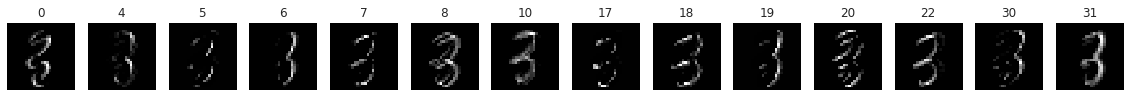

---------- number  2 -----------


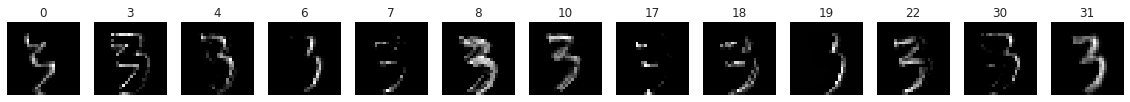

In [167]:
l = [14,1]
Affichage_select_4(Conv2D_1_imgs,l)



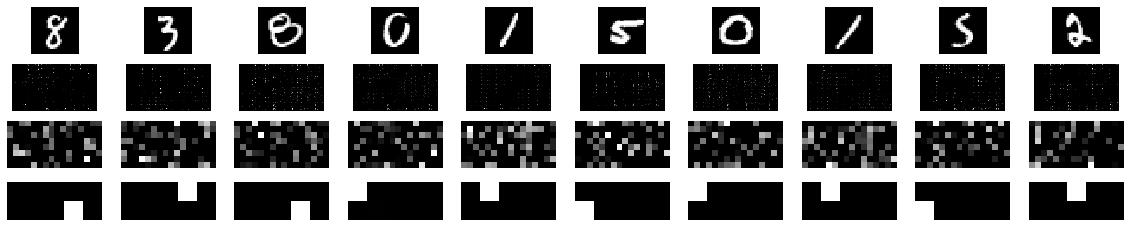

In [23]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(Maxpool_imgs[i].reshape(72, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    # display output first layer Dense
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(Dense1_imgs[i].reshape(8, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output last layer Dense
    ax = plt.subplot(4, n, i + 1 + 3*n )
    plt.imshow(Dense2_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

## III. Comportement des filtres pour différentes écritures 

### 1. Isolement des données : 

In [141]:
def Segregation_label_pd(data, label):
    data_isolated = []
    index_isolated = []
    for i in range (np.shape(data.values)[0]):
        if (data.values[i,-1]==label):
            data_isolated+= [data.values[i,:-1]]
            index_isolated += [i]
    data_isolated = np.array(data_isolated)
    index_isolated = np.array(index_isolated)
    return data_isolated,index_isolated

In [161]:
index_label = Segregation_label_pd(Dtest, 0)[1]
A=[]
imgs = Conv2D_1_imgs
for i in index_label[:10]:
    index_active_filter = selection_4(imgs[i,:,:,:])
    A.extend(index_active_filter)

In [163]:
import collections
collections.Counter(A)

Counter({0: 10,
         4: 10,
         6: 10,
         8: 10,
         10: 10,
         18: 10,
         19: 8,
         22: 10,
         30: 9,
         31: 10,
         3: 2,
         11: 4,
         17: 3,
         7: 5,
         26: 1,
         20: 1})

### 2. Apprentissage sur ce jeu de données :

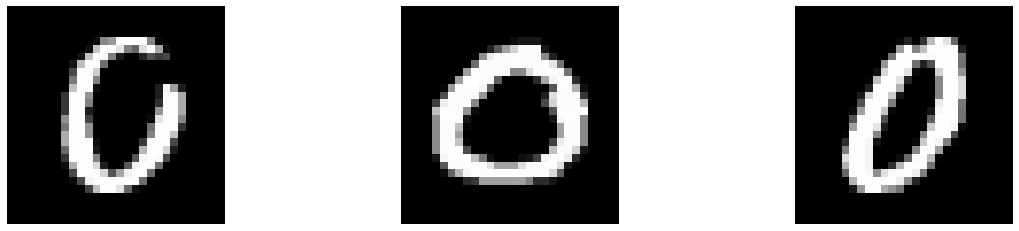

In [142]:
nb_img = 3 # how many digits we will display
label = 0
index_label = Segregation_label_pd(Dtest, label)[1][:nb_img]
length = len(index_label)  # how many digits we will display
plt.figure(figsize=(20, 4))
j = 0
for i in (index_label):
    j = j+1
    # display original
    ax = plt.subplot(1, length, j)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

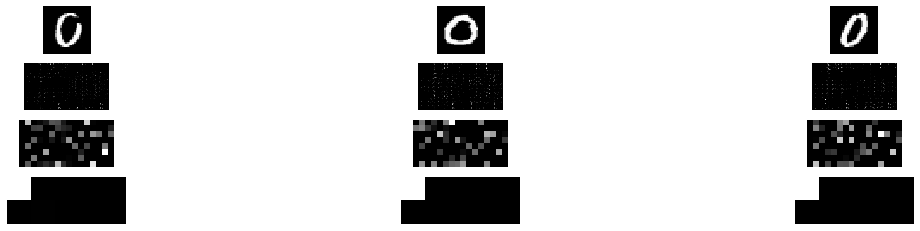

In [143]:
  
plt.figure(figsize=(20, 4))
j = 0
for i in (index_label):
    j = j+1
    # display original
    ax = plt.subplot(4, nb_img, j)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(4, nb_img, j + nb_img)
    plt.imshow(Maxpool_imgs[i].reshape(72, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    # display output first layer Dense
    ax = plt.subplot(4, nb_img, j + 2*nb_img)
    plt.imshow(Dense1_imgs[i].reshape(8, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output last layer Dense
    ax = plt.subplot(4, nb_img, j + 3*nb_img )
    plt.imshow(Dense2_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

---------- number  4 -----------


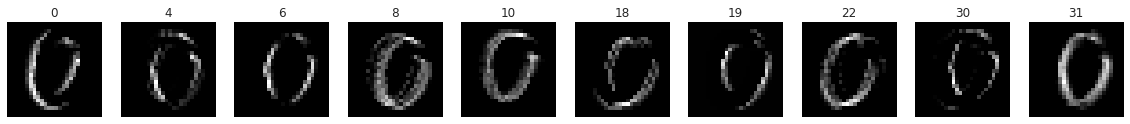

---------- number  7 -----------


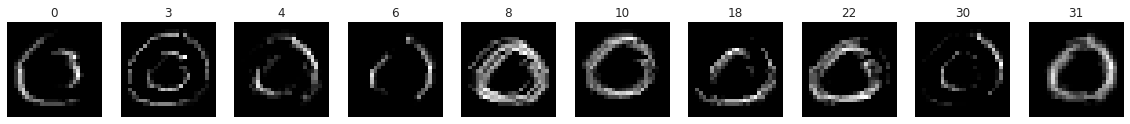

---------- number  28 -----------


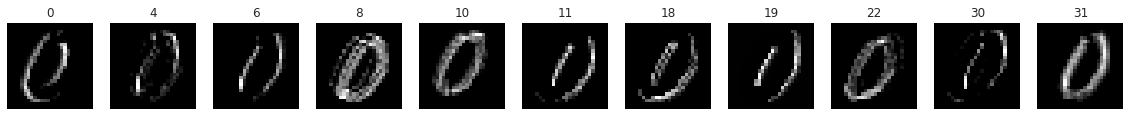

In [144]:
l = index_label
Affichage_select_4(Conv2D_1_imgs,l)
